## i'm following this calmcode tutorial
https://calmcode.io/course/scikit-learn/data

Note to self: USE SKLEARN ENV! Don't break anything thanks
```
# To activate this environment, use                                                                                                                                      
#                                                                                                                                                                        
#     $ conda activate sklearn-env                                                                                                                                       
#                                                                                                                                                                        
# To deactivate an active environment, use                                                                                                                               
#                                                                                                                                                                        
#     $ conda deactivate  
```

In [2]:
from sklearn.datasets import make_friedman1
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [3]:
X_all, y_all = make_friedman1(random_state=42)

In [4]:
from random import shuffle
fold = 4
l = list(zip(X_all,y_all)) #list of tuples (list of features, label)
shuffle(l)
n = len(l)
test_data = l[:n//fold]
train_data = l[n//fold+1:]

In [5]:
X, y = zip(*train_data) #unzip
X = list(X)
y = list(y)

Z, w = zip(*test_data)
Z = list(Z)
w = list(w)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [6]:
pipe = Pipeline([
    ("scale", StandardScaler()), 
    ("model", KNeighborsRegressor())
])
# print(pipe.get_params())

In [7]:
mod = GridSearchCV(estimator = pipe,
             param_grid = {'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]})

In [8]:
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005756,0.002872,0.004962,0.001695,1,{'model__n_neighbors': 1},0.462642,-0.095119,-0.464700,-0.589721,0.383620,-0.060656,0.427918,10
1,0.005166,0.002259,0.004240,0.001287,2,{'model__n_neighbors': 2},0.478062,0.099884,0.154482,-0.217673,0.567568,0.216465,0.281998,9
2,0.003893,0.000774,0.003130,0.000733,3,{'model__n_neighbors': 3},0.543542,0.440017,0.378923,-0.029535,0.613394,0.389268,0.224549,8
3,0.004271,0.001428,0.003603,0.001129,4,{'model__n_neighbors': 4},0.721467,0.465442,0.352240,0.146576,0.690249,0.475195,0.214524,4
4,0.004013,0.001123,0.003500,0.000631,5,{'model__n_neighbors': 5},0.677999,0.588652,0.349824,0.089505,0.618499,0.464896,0.218395,6
5,0.005848,0.003805,0.003951,0.002424,6,{'model__n_neighbors': 6},0.709554,0.540753,0.248758,0.188426,0.678247,0.473148,0.216306,5
6,0.004165,0.001162,0.004439,0.002183,7,{'model__n_neighbors': 7},0.699506,0.521257,0.297282,0.310470,0.646150,0.494933,0.166435,2
7,0.004117,0.000618,0.003206,0.000707,8,{'model__n_neighbors': 8},0.639447,0.523504,0.292684,0.478978,0.565568,0.500036,0.116378,1
8,0.004575,0.001800,0.003590,0.000690,9,{'model__n_neighbors': 9},0.625788,0.525626,0.298861,0.399280,0.436397,0.457190,0.111322,7
9,0.004824,0.001295,0.003883,0.001095,10,{'model__n_neighbors': 10},0.651518,0.530145,0.304724,0.461448,0.511840,0.491935,0.112517,3


In [ ]:
pred = mod.predict(Z)

'''In other words, the best model does this:'''
# 1. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # Fit on X and transform it
Z_scaled = scaler.transform(Z)       # Only transform new data Z

# 2. Fit the model
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_scaled, y)

# 3. Predict on new (scaled) data
predictions = model.predict(Z_scaled)

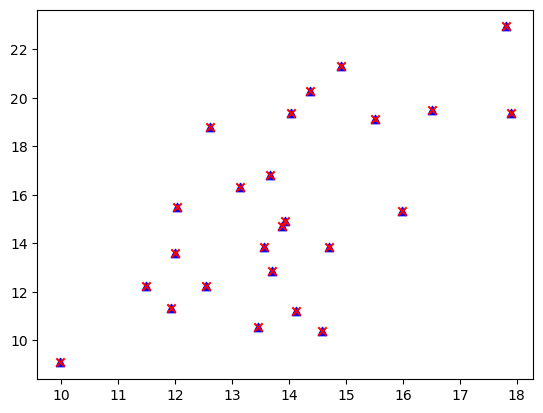

In [20]:
plt.scatter(pred, w, color = "b",marker = "^")
plt.scatter(predictions, w, color = "r", marker = "x")
plt.show()